In [1]:
import json
from datasets import load_dataset
import pandas as pd

/home/st-gorbatovski/.conda/envs/gorbatovski_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df = pd.read_csv(r'/home/st-gorbatovski/sollama/data/processed/tanh_score/1.0-all_data-api_usage-tanh_score.csv',  engine='python', index_col=0).iloc[:, :-7]

In [8]:
df.head()

,Q_CreationDate,Title,Question,Answer,Score,Is_accepted,N_answers,Q_Id
0,2008-08-05 22:26:00.797,Create a directly-executable cross-platform GU...,Python works on multiple platforms and can be ...,Since python is installed on nearly every non-...,0.186186,False,2,4
1,2008-08-05 22:26:00.797,Create a directly-executable cross-platform GU...,Python works on multiple platforms and can be ...,I'm not sure that this is the best way to do i...,0.124933,False,2,4
2,2008-08-22 10:51:19.057,"How do content discovery engines, like Zemanta...",I was wondering how as semantic service like O...,Open Calais probably use language parsing tech...,0.000000,False,1,17
3,2008-08-22 15:34:13.760,How to download a file over HTTP?,I have a small utility that I use to download ...,Following are the most commonly used calls for...,0.293455,False,1,18
4,2008-08-29 04:59:31.200,Find out how much memory is being used by an o...,How would you go about finding out how much me...,For big objects you may use a somewhat crude b...,0.161830,False,1,30


In [ ]:
all_data = []
all_data.extend(data['train'])
all_data.extend(data['val'])
all_data.extend(data['test'])

In [ ]:
df = pd.DataFrame.from_dict(all_data).iloc[:, :-7]

In [9]:
df['Q_Id'] = df.groupby('Q_CreationDate').ngroup()

In [60]:
import pandas as pd
import numpy as np

def binary_comparison(answers):
    """Returns tuples of answers, first always best"""
    pairs = []
    
    for i in range(len(answers)-1):
        for j in range(i+1, len(answers)):
            if answers[i]["Score"] > answers[j]["Score"]:
                pairs.append((answers[i]["Answer"], answers[j]["Answer"]))
            elif answers[i]["Score"] < answers[j]["Score"]:
                pairs.append((answers[j]["Answer"], answers[i]["Answer"]))
            else:
                # random choice when the scores are equal
                if np.random.choice([True, False]):
                    pairs.append((answers[i]["Answer"], answers[j]["Answer"]))
                else:
                    pairs.append((answers[j]["Answer"], answers[i]["Answer"]))
    return pairs
    
def preprocess(df):
    """Returns paired answers (j is better than k)."""

    MAX_PAIRS_PER_QUESTION = 10
    
    # initialize empty lists for new samples
    new_examples = {'q_id': [], 'title': [], "question": [], "response_j": [], "response_k": []}
    
    for qid in df['Q_Id'].unique():
        question_df = df[df['Q_Id'] == qid]
        if len(question_df) <= 1:
            continue
        
        # get pairs where first is always the better one
        pairs = binary_comparison(question_df.to_dict('records'))
        
        # sample if we get more pairs than maximum
        if len(pairs) > MAX_PAIRS_PER_QUESTION:
            indices = np.random.choice(list(range(len(pairs))), MAX_PAIRS_PER_QUESTION, replace=False)
            pairs = [pairs[i] for i in indices]
        
        # construct the samples
        for pair in pairs:
            new_examples["q_id"].append(question_df.iloc[0]['Q_Id'])
            new_examples["title"].append(question_df.iloc[0]['Title'])
            new_examples["question"].append(question_df.iloc[0]['Question'])
            new_examples["response_j"].append(pair[0])
            new_examples["response_k"].append(pair[1])
    
    return pd.DataFrame(new_examples)


In [61]:
contrast_df = preprocess(df)

In [67]:
contrast_df.to_csv('/content/python-api_usage-contrast-tanh_score.csv', index=False)

In [65]:
len(contrast_df.q_id.unique())

1272

In [ ]:
df = pd.read_csv("/home/st-gorbatovski/sollama/data/processed/tanh_score/scaled_filtered_python_qa.csv",)

In [56]:
df = pd.read_csv("/home/st-gorbatovski/sollama/data/processed/tanh_score/scaled_filtered_python_qa.csv", lineterminator='\n')
# dataset = dataset.filter(lambda sample: sample['CreationDate'] > "2023-02-01")

In [3]:
# df.to_csv('/home/st-gorbatovski/sollama/data/processed/tanh_score/scaled_filtered_python_qa.csv', index=False)

In [19]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'], format='mixed')  # убедитесь, что дата создания вопроса в формате datetime

In [57]:
df = df.sort_values('CreationDate', ascending=True)  # сортировка по дате создания вопроса в порядке убывания

In [64]:
new_data_df = df[df["CreationDate"] >= "2023-02-01"]

In [34]:
test.to_json('test.json', orient="records")
val.to_json('validation.json', orient="records")
train.to_json('train.json', orient="records")

In [66]:
grouped = new_data_df.groupby('Q_Id').apply(lambda x: x)

# разделение на тестовый, валидационный и обучающий наборы данных
test = grouped.iloc[-300:]
# val = grouped.iloc[-1500:-1000]
train = grouped.iloc[:-300]

In [70]:
test.to_json('test.json', orient='records')
train.to_json('train.json', orient='records')

In [73]:
dataset = load_dataset('json', data_files={"train":"train.json", 'test': "test.json"})

Found cached dataset json (/home/st-gorbatovski/.cache/huggingface/datasets/json/default-e5b3fe298db99ab3/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)
100%|██████████| 2/2 [00:00<00:00, 862.23it/s]


In [74]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Tags', 'CreationDate', 'Title', 'Users Score', 'Question', 'Answer', 'AnswerCount', 'Score', 'Available Count', 'is_accepted', 'A_Id', 'Q_Id', 'ViewCount', 'Q_Score'],
        num_rows: 762
    })
    test: Dataset({
        features: ['Tags', 'CreationDate', 'Title', 'Users Score', 'Question', 'Answer', 'AnswerCount', 'Score', 'Available Count', 'is_accepted', 'A_Id', 'Q_Id', 'ViewCount', 'Q_Score'],
        num_rows: 300
    })
})

## Train-test comparison

In [2]:
from transformers import LlamaTokenizer

In [3]:
dataset = load_dataset("Myashka/SO-Python_QA-filtered-2023-tanh_score")

Found cached dataset json (/home/st-gorbatovski/.cache/huggingface/datasets/Myashka___json/Myashka--SO-Python_QA-filtered-2023-tanh_score-dacb49a50aa5fb00/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)
100%|██████████| 3/3 [00:00<00:00, 97.51it/s]


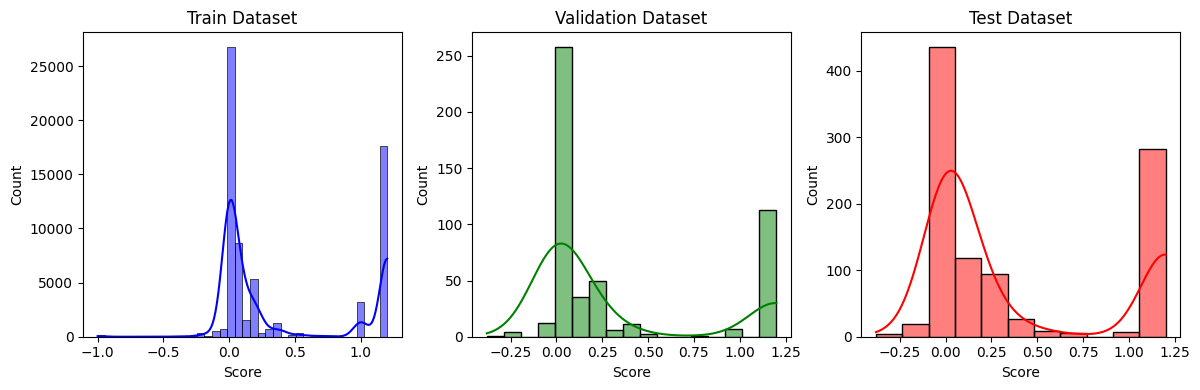

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(train_df['Score'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Train Dataset')

sns.histplot(val_df['Score'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Validation Dataset')

sns.histplot(test_df['Score'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Test Dataset')

plt.tight_layout()
plt.show()


In [4]:
train_df = dataset['train'].to_pandas()
val_df = dataset['validation'].to_pandas()
test_df = dataset['test'].to_pandas()

In [15]:
tokenizer = LlamaTokenizer.from_pretrained("/raid/models/llama-7b-hf", eos_token="</s>")
tokenizer.padding_side = "left"

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


In [18]:
train_df["answer_token_length"] = train_df["Answer"].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=False))
)
train_df["question_token_length"] = train_df["Question"].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=False))
)

val_df["answer_token_length"] = val_df["Answer"].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=False))
)
val_df["question_token_length"] = val_df["Question"].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=False))
)

test_df["answer_token_length"] = test_df["Answer"].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=False))
)
test_df["question_token_length"] = test_df["Question"].apply(
    lambda x: len(tokenizer.encode(x, add_special_tokens=False))
)

Token indices sequence length is longer than the specified maximum sequence length for this model (2622 > 2048). Running this sequence through the model will result in indexing errors


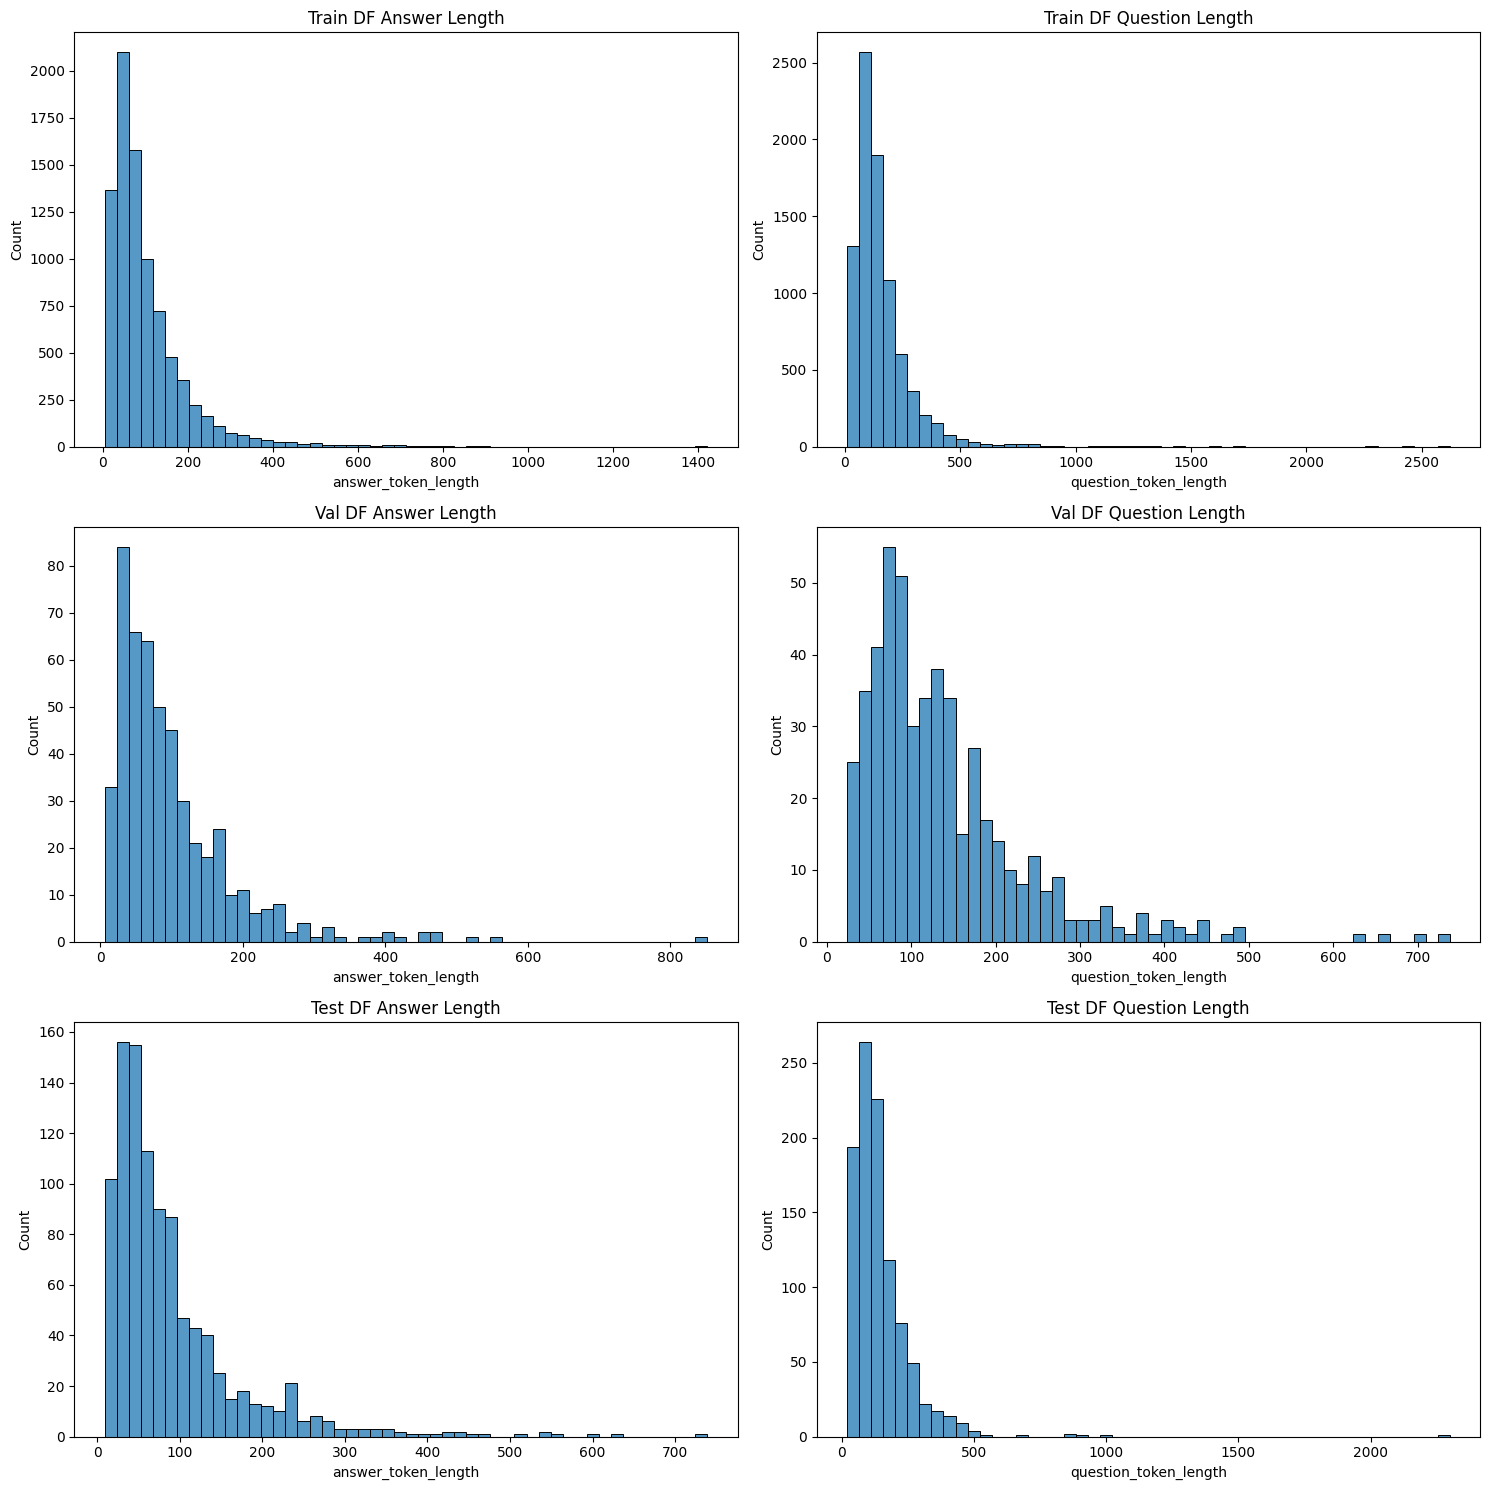

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(data=train_df, x="answer_token_length", ax=axs[0, 0], bins=50)
axs[0, 0].set_title('Train DF Answer Length')

sns.histplot(data=train_df, x="question_token_length", ax=axs[0, 1], bins=50)
axs[0, 1].set_title('Train DF Question Length')

sns.histplot(data=val_df, x="answer_token_length", ax=axs[1, 0], bins=50)
axs[1, 0].set_title('Val DF Answer Length')

sns.histplot(data=val_df, x="question_token_length", ax=axs[1, 1], bins=50)
axs[1, 1].set_title('Val DF Question Length')

sns.histplot(data=test_df, x="answer_token_length", ax=axs[2, 0], bins=50)
axs[2, 0].set_title('Test DF Answer Length')

sns.histplot(data=test_df, x="question_token_length", ax=axs[2, 1], bins=50)
axs[2, 1].set_title('Test DF Question Length')

plt.tight_layout()
plt.show()
